In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
fileName = "LA_AQS_2023.csv" 
df = pd.read_csv(fileName) 

In [3]:
# Create an "ozone only" data frame
df_O3 = df[(df['Parameter Name']=='Ozone') & (df['Duration Description']=='1 HOUR')]
df_O3.head()
o3V = df_O3["Arithmetic Mean"]
df_O3 = pd.DataFrame(data = {"O3" : o3V, 'date' : df_O3["Date (Local)"]})
df_O3.describe()

,O3
count,273.000000
mean,0.027899
std,0.007559
min,0.008333
25%,0.023958
50%,0.028458
75%,0.032958
max,0.045750


In [4]:
# Let's make sure 'date' is actually a date in pandas
df_O3["Date (Local)"] = pd.to_datetime(df_O3["date"])

In [5]:
#dataframe for NO2
df_NO2 = df[(df["Parameter Name"]=="Nitrogen dioxide (NO2)") & (df['Duration Description']=="1 HOUR")]
df_NO2.head()
NO2V = df_NO2["Arithmetic Mean"]
df_NO2 = pd.DataFrame(data = {"NO2" : NO2V, 'date' :df_NO2["Date (Local)"]})
df_NO2.describe()

,NO2
count,1092.000000
mean,13.350240
std,6.208615
min,3.458333
25%,8.804167
50%,11.672917
75%,16.725000
max,33.466667


In [6]:
# Let's make sure 'date' is actually a date in pandas
df_NO2["Date (Local)"] = pd.to_datetime(df_NO2["date"])


In [7]:
#dataframe for PM2.5
df_PM25 = df[(df["Parameter Name"]=="PM2.5 - Local Conditions") & (df['Duration Description']=="1 HOUR")]
df_PM25.head()
PM25v = df_PM25["Arithmetic Mean"]
df_PM25 = pd.DataFrame(data = {"PM25" : PM25v, 'date' :df_PM25["Date (Local)"]})
df_PM25.describe()

,PM25
count,271.000000
mean,11.936013
std,5.106624
min,3.250000
25%,8.158333
50%,10.912500
75%,15.145833
max,31.979167


In [8]:
# Let's make sure 'date' is actually a date in pandas
df_PM25["Date (Local)"] = pd.to_datetime(df_NO2["date"])


In [9]:
df_1 = pd.DataFrame(data = {"NO2" : df_NO2["NO2"], 'Date' : df_NO2['date']})
df_2 = pd.DataFrame(data = {"O3" : df_O3["O3"], 'Date' : df_O3['date']})
df_all = df_1.merge(df_2, on=['Date'])
df_all.head()

,NO2,Date,O3
0,4.816667,2023-01-01,0.031708
1,4.550000,2023-01-01,0.031708
2,4.550000,2023-01-01,0.031708
3,4.816667,2023-01-01,0.031708
4,14.720833,2023-01-02,0.015792


In [10]:
#merging everything into a single dataframe
df_11 = pd.DataFrame(data = {"PM25" : df_PM25["PM25"], 'Date' : df_PM25['date']})

df_all_all = df_all.merge(df_11, on=['Date'])
df_all_all.head()

,NO2,Date,O3,PM25
0,4.816667,2023-01-01,0.031708,5.0875
1,4.550000,2023-01-01,0.031708,5.0875
2,4.550000,2023-01-01,0.031708,5.0875
3,4.816667,2023-01-01,0.031708,5.0875
4,14.720833,2023-01-02,0.015792,9.1875


<Axes: xlabel='PM25', ylabel='O3'>

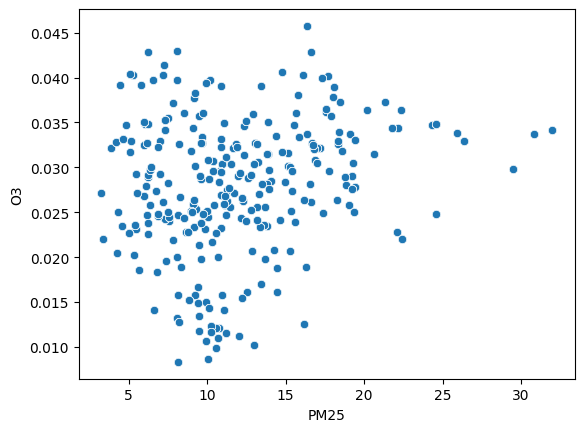

In [11]:
# Make a scatterplot for PM2.5 and O3
sns.scatterplot(data=df_all_all, x=df_all_all["PM25"], y=df_all_all["O3"])

<Axes: xlabel='NO2', ylabel='O3'>

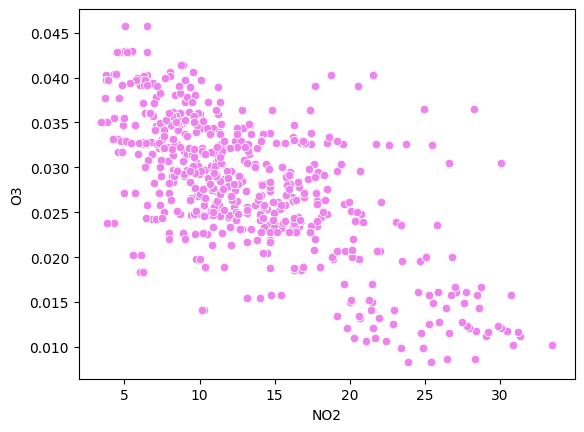

In [12]:
# Make a scatterplot for O3 and NO2
sns.scatterplot(data=df_all, x=df_all_all["NO2"], y=df_all_all["O3"], color = 'violet')

In [13]:
sumMonths = pd.DatetimeIndex(df_all_all['Date']).month.values
sumMonths

array([1, 1, 1, ..., 9, 9, 9], dtype=int32)

In [14]:
sIdx = sumMonths - sumMonths #Set values (including winter) to zero
print(sIdx)

[0 0 0 ... 0 0 0]


In [15]:
sIdx[sumMonths == 6] = 1 #Set summer to 1
sIdx[sumMonths == 7] = 1
sIdx[sumMonths == 8] = 1

sIdx[sumMonths == 1] = 0 #Set winter to 0
sIdx[sumMonths == 2] = 0
sIdx[sumMonths == 3] = 0

sIdx[sumMonths == 4] = -1
sIdx[sumMonths == 5] = -1
sIdx[sumMonths == 9] = -1 #Set others to -1


In [16]:
df_all_all['summer/winter'] = sIdx
df_all_all.describe()

,NO2,O3,PM25,summer/winter
count,1084.000000,1084.000000,1084.000000,1084.000000
mean,13.306238,0.027882,11.936013,0.011070
std,6.205608,0.007571,5.099546,0.817552
min,3.458333,0.008333,3.250000,-1.000000
25%,8.780952,0.023833,8.145833,-1.000000
50%,11.618750,0.028458,10.912500,0.000000
75%,16.641667,0.032958,15.154167,1.000000
max,33.466667,0.045750,31.979167,1.000000


In [17]:
df_all_all = df_all_all[df_all_all['summer/winter'] > -1]
df_all_all.describe()

,NO2,O3,PM25,summer/winter
count,728.000000,728.000000,728.000000,728.000000
mean,14.480153,0.026001,11.432142,0.505495
std,6.569484,0.007628,4.724513,0.500314
min,3.791667,0.008333,3.250000,0.000000
25%,9.615625,0.022667,8.100000,0.000000
50%,13.147917,0.026687,10.722917,1.000000
75%,17.832292,0.031875,13.887500,1.000000
max,33.466667,0.042917,31.979167,1.000000


In [18]:
# Make them arrays by uisng np.array
xVal = df_all_all[['NO2','O3','PM25']].to_numpy()
yVal = np.array(df_all_all['summer/winter'])


1. Using these data as input, train a ridge classifier to predict if the measurements come from summer or winter.

In [19]:
from sklearn.model_selection import train_test_split
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(xVal, yVal, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Ridge Classifier

In [20]:
for alpha in np.arange(0,1,0.05):
    rclass = RidgeClassifier(alpha)
    rclass.fit(X_train_temp,y_train_temp)
    score = rclass.score(X_train_temp,y_train_temp)
    print(score, "for aplha", alpha) #score when the test set is the the training set

0.8127147766323024 for aplha 0.0
0.7903780068728522 for aplha 0.05
0.7920962199312714 for aplha 0.1
0.7955326460481099 for aplha 0.15000000000000002
0.7955326460481099 for aplha 0.2
0.7955326460481099 for aplha 0.25
0.7955326460481099 for aplha 0.30000000000000004
0.7955326460481099 for aplha 0.35000000000000003
0.7955326460481099 for aplha 0.4
0.7955326460481099 for aplha 0.45
0.7955326460481099 for aplha 0.5
0.7955326460481099 for aplha 0.55
0.7955326460481099 for aplha 0.6000000000000001
0.7955326460481099 for aplha 0.65
0.7955326460481099 for aplha 0.7000000000000001
0.7955326460481099 for aplha 0.75
0.7955326460481099 for aplha 0.8
0.7955326460481099 for aplha 0.8500000000000001
0.7955326460481099 for aplha 0.9
0.7955326460481099 for aplha 0.9500000000000001


In [21]:
for alpha in np.arange(0,1,0.05):
    rclass = RidgeClassifier(alpha)
    rclass.fit(X_train_temp,y_train_temp)
    score = rclass.score(X_test,y_test)
    print(score, "for aplha", alpha) # score for test set trained with training set

0.7123287671232876 for aplha 0.0
0.684931506849315 for aplha 0.05
0.684931506849315 for aplha 0.1
0.684931506849315 for aplha 0.15000000000000002
0.684931506849315 for aplha 0.2
0.684931506849315 for aplha 0.25
0.684931506849315 for aplha 0.30000000000000004
0.684931506849315 for aplha 0.35000000000000003
0.684931506849315 for aplha 0.4
0.684931506849315 for aplha 0.45
0.684931506849315 for aplha 0.5
0.684931506849315 for aplha 0.55
0.684931506849315 for aplha 0.6000000000000001
0.684931506849315 for aplha 0.65
0.684931506849315 for aplha 0.7000000000000001
0.684931506849315 for aplha 0.75
0.684931506849315 for aplha 0.8
0.684931506849315 for aplha 0.8500000000000001
0.684931506849315 for aplha 0.9
0.684931506849315 for aplha 0.9500000000000001


In [22]:
for alpha in np.arange(0,1,0.05):
    rclass = RidgeClassifier(alpha)
    rclass.fit(X_train_temp,y_train_temp)
    score = rclass.score(X_val,y_val)
    print(score, "for aplha", alpha) # score for test set is the validating set 

0.6986301369863014 for aplha 0.0
0.7123287671232876 for aplha 0.05
0.6986301369863014 for aplha 0.1
0.6986301369863014 for aplha 0.15000000000000002
0.6986301369863014 for aplha 0.2
0.6986301369863014 for aplha 0.25
0.6986301369863014 for aplha 0.30000000000000004
0.6986301369863014 for aplha 0.35000000000000003
0.6986301369863014 for aplha 0.4
0.6986301369863014 for aplha 0.45
0.6986301369863014 for aplha 0.5
0.6986301369863014 for aplha 0.55
0.6986301369863014 for aplha 0.6000000000000001
0.6986301369863014 for aplha 0.65
0.6986301369863014 for aplha 0.7000000000000001
0.6986301369863014 for aplha 0.75
0.6986301369863014 for aplha 0.8
0.6986301369863014 for aplha 0.8500000000000001
0.6986301369863014 for aplha 0.9
0.6986301369863014 for aplha 0.9500000000000001


In [23]:
# Mean squared error 
from sklearn.metrics import mean_squared_error

In [24]:
rclass = RidgeClassifier(0.9)
rclass.fit(X_train_temp,y_train_temp)
ypred = rclass.predict(X_test)
mean_squared_error(y_test,ypred)

0.3150684931506849

# Logistic regression

In [25]:

clf = LogisticRegression().fit(X_train_temp, y_train_temp)
clf.predict(X_train_temp)
clf.predict_proba(X_train_temp)
clf.score(X_train_temp, y_train_temp) #score for training set

0.7955326460481099

In [26]:
clf.predict(X_test)
clf.predict_proba(X_test)
clf.score(X_test, y_test) #score for testing set

0.6712328767123288

In [27]:
clf.predict(X_val)
clf.predict_proba(X_val)
clf.score(X_val, y_val) #score for validating set

0.684931506849315

2. What cost function are you using?

- The cost function that I am using is Penalized Regression

3. What is the optimal ridge penalty parameter based on your training data?

- The optimal ridge penalty parameter based on my training data could be anything from 0.2 to 0.95.

4. What is the optimal ridge penalty parameter on your validation data?

- The optimal ridge penalty paramter on my validation data is 0.0.

5. What is your final model error?(Be sure to report the most honest error assessment).

- The final model error is 0.1780821917808219.

6. If you redo your train/validation splits, do you get the same answers?

- Redoing the train/validation splits give the same results.

7. Compare the ridge classifier with a logistic regression model. Which one performs the best?

- For this particular dataset, the ridge classifier compared with a logistic regression model performs the same.